In [1]:
#import libs
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#generate data
np.random.seed(11)
means = [[1, 2], [3, 2]]
cov = [[0.4, 0.5], [0.5, 0.4]]
nb_datas = 10
a = np.random.multivariate_normal(means[0], cov, nb_datas).T
b = np.random.multivariate_normal(means[1], cov, nb_datas).T

X = np.concatenate((a, b), axis=1)
X = np.concatenate((X, np.ones((1, nb_datas*2))), axis=0)
Y = np.concatenate((np.ones((1,nb_datas)), -1*np.ones((1, nb_datas))), axis=1)




def draw_line(w):
    w0, w1, w2 = w[0], w[1], w[2]
    if w2 != 0:
        x11, x12 = 0,0
        return plt.plot([x11, x12], [-(w1 * x11 + w0) / w2, -(w1 * x12 + w0) / w2], 'k')
    else:
        x10 = -w0 / w1
        return plt.plot([x10, x10], [-100, 100], 'k')


<ipython-input-2-12183492d42a>:6: RuntimeWarning: covariance is not positive-semidefinite.
  a = np.random.multivariate_normal(means[0], cov, nb_datas).T
<ipython-input-2-12183492d42a>:7: RuntimeWarning: covariance is not positive-semidefinite.
  b = np.random.multivariate_normal(means[1], cov, nb_datas).T


In [3]:
#functions of Perceptron
def h(w, x):
  w = np.array(w)
  return np.sign(np.dot(w.T, x))

def check_converged(w, x, y):
  return np.array_equal(h(w, x), y)

def perceptron(x, y , w0):
  w = [w0]
  N = x.shape[1]
  d = x.shape[0]
  mis = []

  while True:
    #mix_data
    mix = np.random.permutation(N)
    #learning

    for i in range(N):
      xi = x[:, mix[i]].reshape(d, 1)
      yi = y[:, mix[i]]
      if h(w[-1], xi)[0] != yi :
        w_new = w[-1] + yi*xi/12
        w.append(w_new)
        mis.append(mix[i])

    if check_converged(w[-1], x, y):
      break

  return (w, mis)


In [4]:
#training
d = X.shape[0]
N = X.shape[1]
np.random.seed(1)

w0 = np.random.randn(d, 1)
print(w0)
(w, mis) = perceptron(X, Y, w0)
print("after training: ")
print(w[-1])


[[ 1.62434536]
 [-0.61175641]
 [-0.52817175]]
after training: 
[[-0.38470699]
 [ 0.48483684]
 [-0.02817175]]


In [13]:
#test with new data
x1 = float(input())
x2 = float(input())
point = [x1, x2, 1]
point = np.array(point).reshape(3, 1)
result = int(np.sign(np.dot(w[-1].T, point)))
if result == 1:
  print("New data belongs to set + ")
else:
  print("New data belongs to set - ")



2.5
2
New data belongs to set - 


[-0.23753778  0.73175611  0.93408575  1.4305081   0.47927452  1.4881304
  0.66283343  1.62546629  0.85781333  0.86802249]


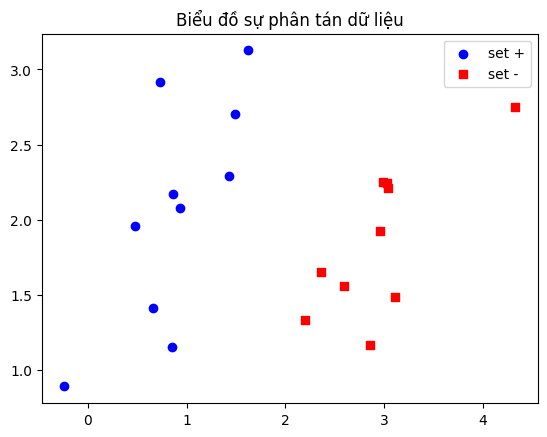

In [5]:
#visualization
a1 = a.T[:, 0]
a2 = a.T[:, 1]
b1 = b.T[:, 0]
b2 = b.T[:, 1]
print(a1)

plt.scatter(a1, a2, label = "set +", color = 'blue', marker = 'o')
plt.scatter(b1, b2, label = "set -", color = 'red', marker = 's')

# draw_line(w[-1])

plt.title('Biểu đồ sự phân tán dữ liệu')

plt.legend()

plt.show()

Các phần khác đã ok, chỉ riêng phần visualization cần chỉnh sửa lại để vẽ được đường thẳng phân cách cuối cùng
